<b> This notebook contains the Text Processing - 2 part of this chart.
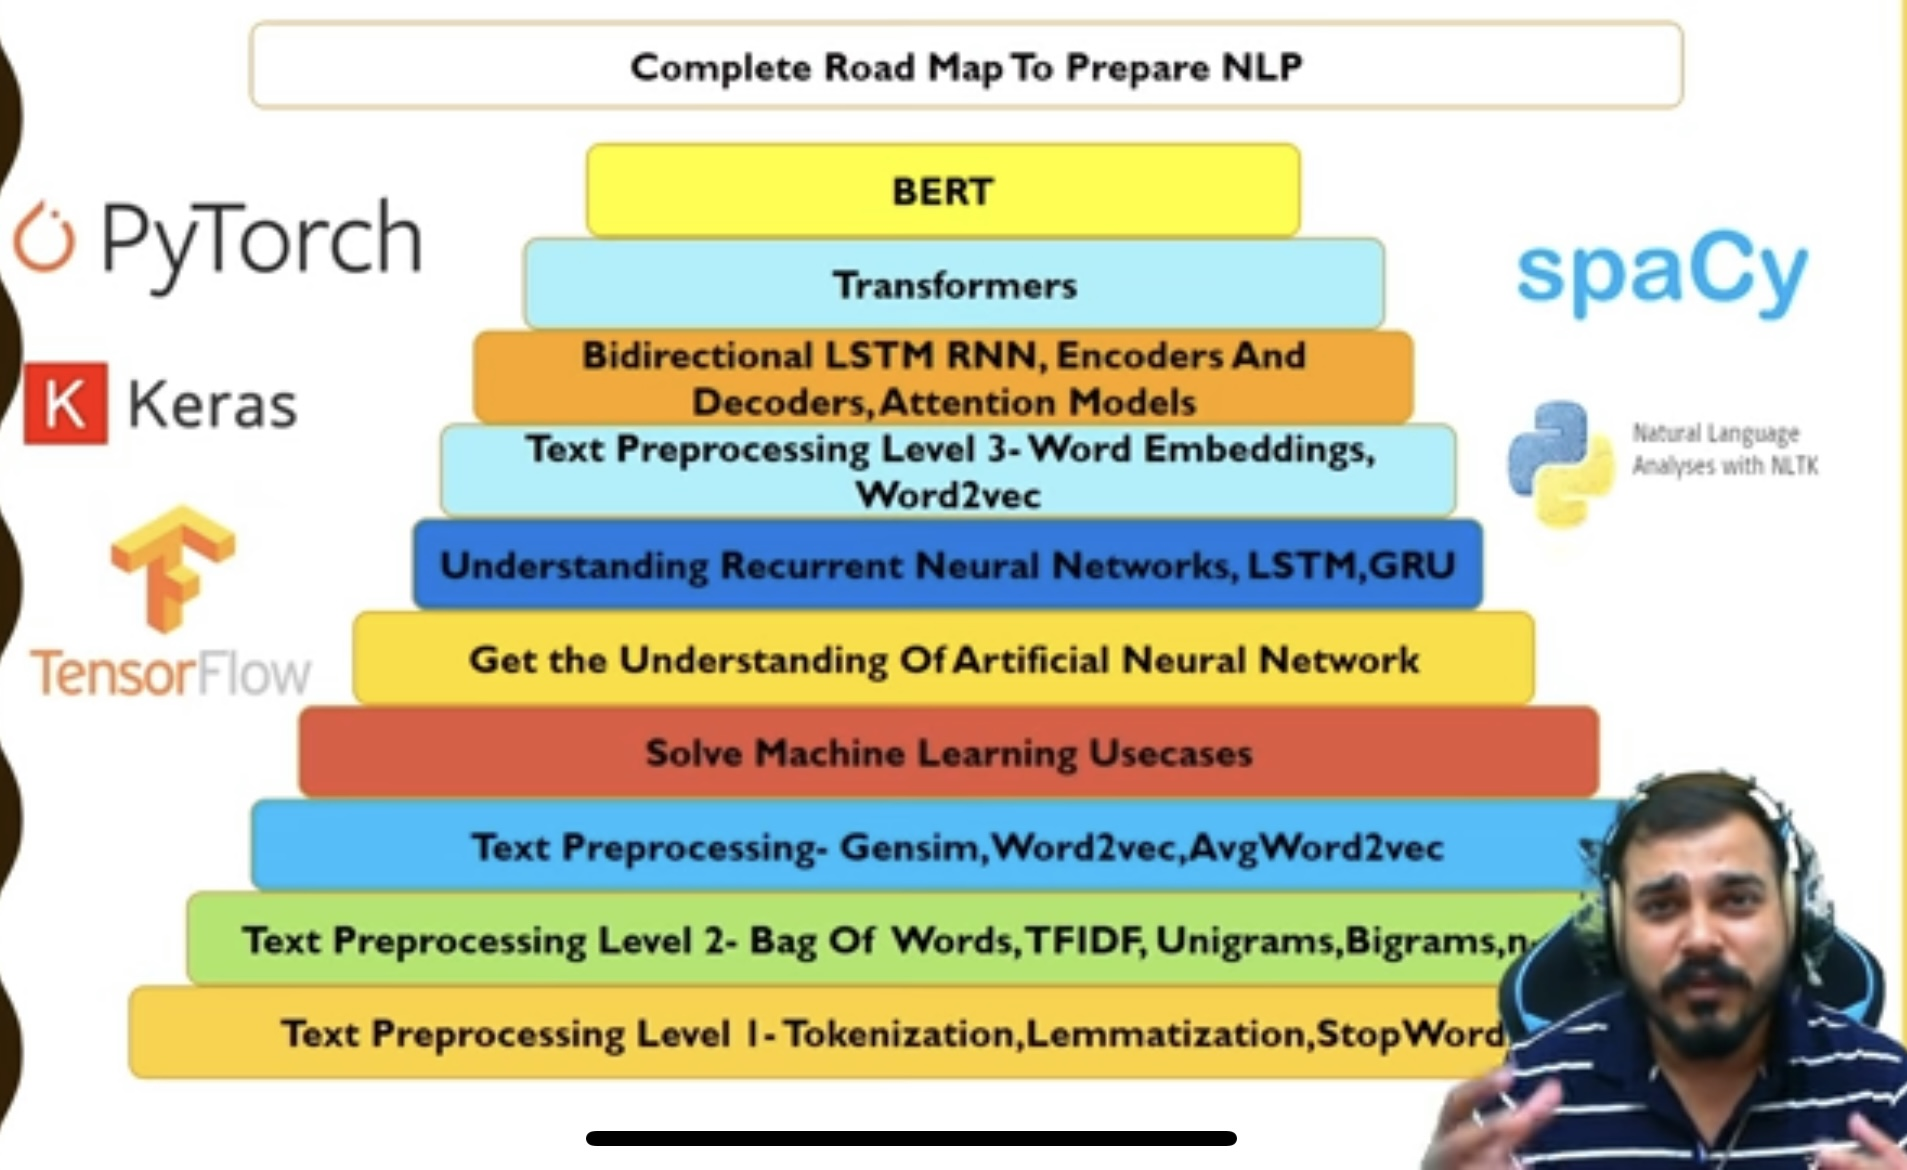

* Bag of Words
* TF-IDF
* Unigrams
* Bigrams
* n-grams

<b> Bag of words
    
    representation of text that describes the occurrence of words within a document. We just keep track of word counts and disregard the grammatical details and the word order. It is called a “bag” of words because any information about the order or structure of words in the document is discarded.

In [2]:
paragraph = """I have three visions for India. In 3000 years of our history, people from all over 
               the world have come and invaded us, captured our lands, conquered our minds. 
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours. 
               Yet we have not done this to any other nation. We have not conquered anyone. 
               We have not grabbed their land, their culture, 
               their history and tried to enforce our way of life on them. 
               Why? Because we respect the freedom of others.That is why my 
               first vision is that of freedom. I believe that India got its first vision of 
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India 
               stands up to the world, no one will respect us. Only strength respects strength. We must be 
               strong not only as a military power but also as an economic power. Both must go hand-in-hand. 
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of 
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life. 
               I see four milestones in my career"""

In [3]:
import nltk

In [4]:
# Cleaning the text
# Pre-processing
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [5]:
ps = PorterStemmer()
lem = WordNetLemmatizer()
sentences = nltk.sent_tokenize(paragraph)

* Token paragraph into sentences
* Convert to lower case
* remove non-word chars
* remove pronunciations
* Either tokenize or split the sentence into words. 

In [6]:
# to store all sentences in the list after cleaning
corpus = []

In [7]:
for i in range(len(sentences)):
    # for non-alphanumeric chars
    #bog = re.sub('^[a-zA-Z]', ' ', sentences[i])
    bog = re.sub('\W', ' ', sentences[i])
    bog = bog.lower()
    #bog = nltk.word_tokenize(bog)
    bog = bog.split()
    bog = [lem.lemmatize(g) for g in bog if g not in set(stopwords.words('english'))]
    bog = " ".join(bog)
    
    corpus.append(bog)

In [8]:
corpus

['three vision india',
 '3000 year history people world come invaded u captured land conquered mind',
 'alexander onwards greek turk mogul portuguese british french dutch came looted u took',
 'yet done nation',
 'conquered anyone',
 'grabbed land culture history tried enforce way life',
 '',
 'respect freedom others first vision freedom',
 'believe india got first vision 1857 started war independence',
 'freedom must protect nurture build',
 'free one respect u',
 'second vision india development',
 'fifty year developing nation',
 'time see developed nation',
 'among top 5 nation world term gdp',
 '10 percent growth rate area',
 'poverty level falling',
 'achievement globally recognised today',
 'yet lack self confidence see developed nation self reliant self assured',
 'incorrect',
 'third vision',
 'india must stand world',
 'believe unless india stand world one respect u',
 'strength respect strength',
 'must strong military power also economic power',
 'must go hand hand',
 'good

In [9]:
sentences

['I have three visions for India.',
 'In 3000 years of our history, people from all over \n               the world have come and invaded us, captured our lands, conquered our minds.',
 'From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,\n               the French, the Dutch, all of them came and looted us, took over what was ours.',
 'Yet we have not done this to any other nation.',
 'We have not conquered anyone.',
 'We have not grabbed their land, their culture, \n               their history and tried to enforce our way of life on them.',
 'Why?',
 'Because we respect the freedom of others.That is why my \n               first vision is that of freedom.',
 'I believe that India got its first vision of \n               this in 1857, when we started the War of Independence.',
 'It is this freedom that\n               we must protect and nurture and build on.',
 'If we are not free, no one will respect us.',
 'My second vision for India’s developme

In [10]:
#bag of words

from sklearn.feature_extraction.text import CountVectorizer
'''
this library, CountVectorizer is very useful in-
creating histogram of words
creating matrix of occurrence of words in each doc/sentence
'''

'\nthis library, CountVectorizer is very useful in-\ncreating histogram of words\ncreating matrix of occurrence of words in each doc/sentence\n'

In [11]:
cv = CountVectorizer()

In [12]:
X = cv.fit_transform(corpus).toarray()

In [13]:
X #matrix of words

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

 <b>tf–idf
    
 short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection 

term frequency = no of rep words in a sentence / no of words in a sentence

Inverse Doc Frequency = log(no of sentences / no of sentences containing words)

TF * IDF gives the word importance

In [14]:
tfidf = nltk.sent_tokenize(paragraph)
corp_tf = []

In [15]:
for i in range(len(tfidf)):
    # for non-alphanumeric chars
    #bog = re.sub('^[a-zA-Z]', ' ', sentences[i])
    tf = re.sub('\W', ' ', tfidf[i])
    tf = tf.lower()
    #bog = nltk.word_tokenize(bog)
    tf = tf.split()
    tf = [lem.lemmatize(g) for g in tf if g not in set(stopwords.words('english'))]
    tf = " ".join(tf)
    
    corp_tf.append(tf)

In [16]:
# create TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tfvect = TfidfVectorizer()
X_tf = tfvect.fit_transform(corp_tf).toarray()

In [17]:
X_tf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.32348709, ..., 0.24491817, 0.28871979,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [18]:
new = '''
Hi Shivprasad.
I wanted to inform you that I will be unavailable tomorrow, as I am having my travel plans. I have applied for leave. Apart from that, I have my flight today at 8.00PM. So, I need to rush from office around 5 pm inorder to avoid traffic-jams. So, would you mind reviewing my task before our standup call?
'''

In a nutshell, this is what is to be done-

* tokenize by word and sentence
* lemmatize using WordNetLemmatizer
* get bog
* calculate tfidf

In [19]:
msg = [] # to store the resultant array
sent_new = nltk.sent_tokenize(new)

In [20]:
for i in range(len(sent_new)):
    toko = re.sub('\W',' ', sent_new[i])
    toko = toko.lower()
    toko = toko.split()
    toko = [lem.lemmatize(a) for a in toko if a not in set(stopwords.words('english'))]
    toko = " ".join(toko)
    
    msg.append(toko)

In [21]:
X_new = cv.fit_transform(msg).toarray() #bog using countvectorizer
X_new

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [22]:
X_new_tf = tfvect.fit_transform(msg).toarray()
X_new_tf

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.70710678,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.40824829, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.40824829, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.40824829, 0.        ,
        0.40824829, 0.40824829, 0.40824829, 0.        ],
       [0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.70710678, 0.        , 0.        , 0.        ,
  